## Solution to the Diffusion Equation - Caleb Wilkins 03/18/2021

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Below is a program that can be used to solve the diffusion problem:

$$\frac{∂u}{∂t} = \frac{∂^{2}u}{∂x^{2}}$$

where; x∈(0,L) and t∈(0,T]

for u(x, t) over the domain 0 ≤ x ≤ 1, t ≥ 0, with the boundary
conditions:

u(0, t) = 100, u(1, t) = 100, u(x, 0) = 0

using the explicit forward differencing method with ∆x = 0.1.

In [2]:
# 'fdm' in function name standing for 'forward differencing method'.

def fdm_solver(I, L, Nx, T, dt):
    
    """
    ===================================
    | Argument  |     Definition      |
    ===================================
    I           | Time boundary condition given by assignment
    L           | Max value of our x-range
    Nx          | Number of mesh points we want to solve for u at, given by assignment
    T           | Max value of our t-range (time stopping point)
    dt          | Time step left as an argument so that we may easily change it for experimenting in Part 2
    ===================================
    
    This function returns the vector solution to the function u(x,t) that solves the differential diffusion 
    equation.
    
    """
   
    # Using the Forward Differencing (Euler) Method with Python for loops.
    # For this method F <= 0.5 is the stability criterion.
    
    # Creating our mesh points in space.
    x = np.linspace(0, L, Nx+1)  
    
    # Specified value for dx we should use as given by assignment.
    dx = 0.1 
    
    # Alpha is neglected in our given diffusion equation so we can assume it is constant and equal to 1.
    a = 1
    
    # F is the key parameter in the discrete diffusion equation. F is a dimensionless number that combines 
    # the key physical parameter in the problem, α, and the discretization parameters Δx and Δt into a single 
    # parameter. All the properties of the forward differencing numerical method are critically dependent 
    # upon the value of F.
    F = a * dt / dx**2
    
    # Creating our mesh points in time.
    Nt = int(round(T/float(dt)))
    t = np.linspace(0, T, Nt+1)   
    
    # Unknown u we solve for at each new time.
    u = np.zeros(Nx+1) # solution array
    
    # Known u at each previous times. 
    u_1 = np.zeros(Nx+1) # solution at t-dt

    # Setting time boundary condition u(x,0) = 0 as given by assignment.
    for i in range(0, Nx+1):
        u_1[i] = 0      
    
    for n in range(0, Nt): 
        
        # Updating all inner mesh points via slicing of the u array.
        u[1:Nx] = u_1[1:Nx] + F*(u_1[0:Nx-1] - 2*u_1[1:Nx] + u_1[2:Nx+1])

        # Insert given boundary conditions.
        u[0] = 100;  u[Nx] = 100
        
        # Switch variables before next step as standard in forward differencing methods. 
        u_1, u = u, u_1
        
        to_plot.append(u[4])

    return u

# Filling a generic python list with the values we obtain from slicing the u array for the desired x-value.
to_plot = []

We will now plot the results for u(0.4, t) for 0 < t < 0.4 for two different timesteps:
∆t = .01 and .002. Since we know the stability criterion, we will begin with the time step value that will give a stable result.

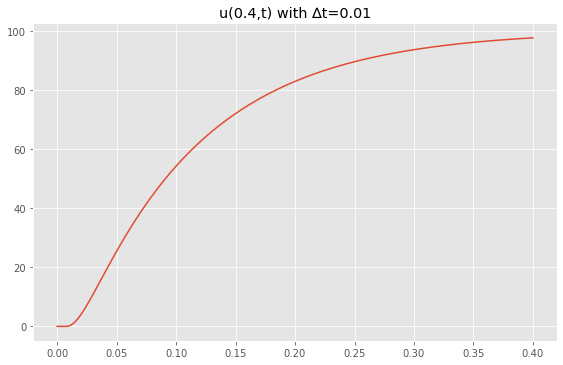

In [3]:
fdm_solver(0, 1, 10, 0.4, 0.002)

t = np.linspace(0, 0.4, 200, endpoint=True)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
fig.tight_layout() 

ax.set_title('u(0.4,t) with ∆t=0.01')
ax.plot(t, to_plot);

Now we will graph the time step value that will give an unstable result to be able to visualize the difference in the results.

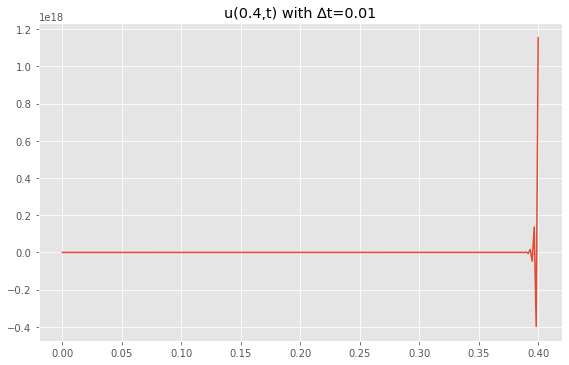

In [4]:
fdm_solver(0, 1, 10, 0.4, 0.01)

t2 = np.linspace(0, 0.4, 240, endpoint=True)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
fig.tight_layout() 

ax.set_title('u(0.4,t) with ∆t=0.01')
ax.plot(t2, to_plot);

Since the value of F, our key parameter of the diffusion equation, depends heavily on the timestep 
(F = α * Δt / Δx^2) and we know that the forward differencing method is unstable for F values of higher than 0.5, it is expected that our graph with ∆t = 0.01 would be unstable since ∆t=0.01 would make F=1. In contrast, our graph of ∆t=0.002 is the expected, desired result of an exponential solution to the diffusion equation, since ∆t=0.002 would make F=0.2, a very stable value. These expected results are clearly displayed in the graphs above.

Now, we will plot the results for u(x, .12) and u(x, .4) to explore how the time range affects how quickly the solution exponentially decays/grows. In our conclusion we will discuss how this is expected when we consider the analytical solution to the diffusion equation.

(For these we will use the timestep we determined to be stable.)

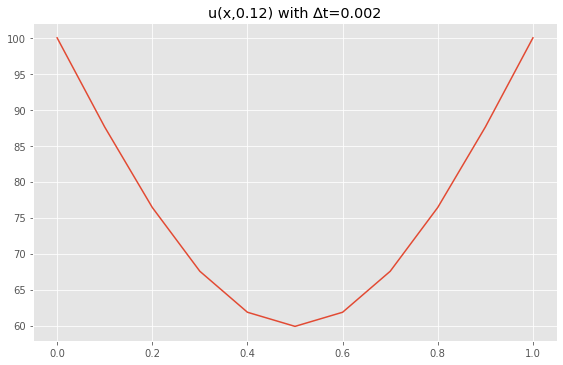

In [5]:
x = np.linspace(0, 1, 11, endpoint=True)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
fig.tight_layout() 

ax.set_title('u(x,0.12) with ∆t=0.002')
ax.plot(x, fdm_solver(0, 1, 10, 0.12, 0.002));

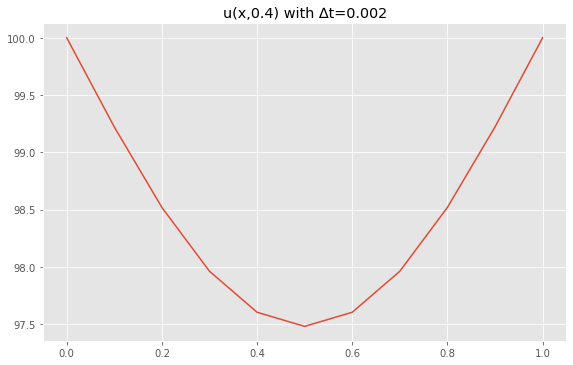

In [6]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
fig.tight_layout() 

ax.set_title('u(x,0.4) with ∆t=0.002')
ax.plot(x, fdm_solver(0, 1, 10, 0.4, 0.002));

Comparing these two graphs, we see that changing the time range impacts how quickly the solution to the diffusion equation exponentially decays/grows. This is in line with the general solution of the diffusion equation, which can be built as a linear combination of basic components, as shown:

$$
e^{-atk^{2}}e^{ikx}
$$